In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


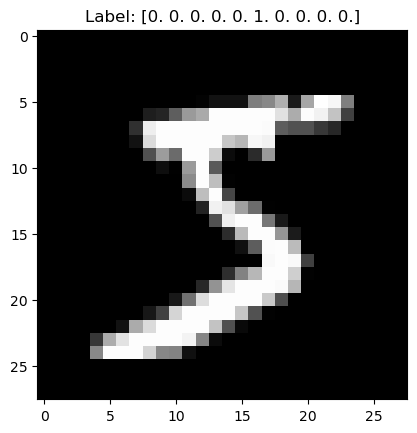

In [10]:
# Check the shape of the data
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Testing data shape:", X_test.shape)    # (10000, 28, 28)

# Display a sample image
plt.imshow(X_train[0], cmap='gray')
plt.title("Label: " + str(y_train[0]))
plt.show()


In [4]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 image to a 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons for 10 classes (0-9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 4s 4ms/step - loss: 0.3466 - accuracy: 0.9029 - val_loss: 0.1349 - val_accuracy: 0.9620
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1391 - accuracy: 0.9586 - val_loss: 0.1082 - val_accuracy: 0.9702
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0960 - accuracy: 0.9705 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.0936 - val_accuracy: 0.9722
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0807 - val_accuracy: 0.9755
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0787 - val_accuracy: 0.9758
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0832 - val_accuracy: 0.9767
Epoch 

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9764
Test Accuracy: 0.9764000177383423


1/1 [==============================] - 0s 92ms/step


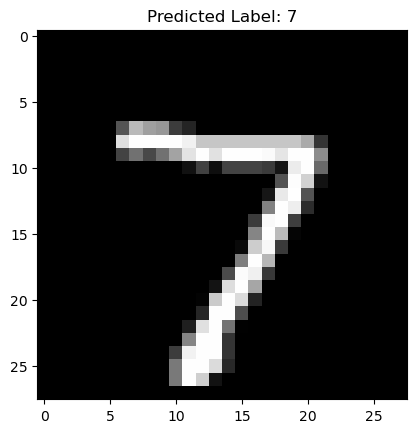

In [8]:
# Predict on some test samples
sample_index = 0
prediction = model.predict(X_test[sample_index].reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

plt.imshow(X_test[sample_index], cmap='gray')
plt.title("Predicted Label: " + str(predicted_label))
plt.show()